In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

from sklearn.feature_selection import RFE

# Saving models
import pickle
import gzip


In [2]:
file_path = "ACS_census_dataset.csv"
df = pd.read_csv(file_path)

In [3]:
df.shape

(1682005, 10)

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
AGEP                0
SEX                 0
RAC1P               0
SCHL                0
MAR                 0
OCCP                0
WKHP                0
COW                 0
POBP                0
Income_Above_50K    0
dtype: int64


In [5]:
df.shape

(1682005, 10)

In [6]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

# Display the number of duplicate rows
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")

# Display the duplicate rows if any
if not duplicate_rows.empty:
    display(duplicate_rows)


Total duplicate rows: 80296


,AGEP,SEX,RAC1P,SCHL,MAR,OCCP,WKHP,COW,POBP,Income_Above_50K
60,22,1,1,20.0,5,1555.0,40.0,5.0,17,0
91,42,1,1,16.0,1,6050.0,45.0,1.0,303,0
97,30,1,1,21.0,5,5360.0,40.0,5.0,6,0
141,21,1,2,19.0,5,7640.0,25.0,1.0,11,0
147,19,1,9,18.0,5,9130.0,40.0,1.0,36,0
...,...,...,...,...,...,...,...,...,...,...
1681945,50,2,1,21.0,1,120.0,40.0,1.0,29,1
1681948,25,2,1,21.0,5,2640.0,40.0,1.0,48,0
1681966,47,2,1,22.0,1,120.0,45.0,1.0,29,1
1681970,34,1,6,22.0,1,1021.0,40.0,1.0,207,1


In [7]:
df = df.drop_duplicates()
print("Duplicates removed successfully.")


Duplicates removed successfully.


In [8]:
# New shape of dataset after duplicates removal
df.shape

(1601709, 10)

In [9]:
df.head()

,AGEP,SEX,RAC1P,SCHL,MAR,OCCP,WKHP,COW,POBP,Income_Above_50K
0,22,1,1,20.0,5,1555.0,40.0,5.0,17,0
1,18,2,1,19.0,5,4640.0,20.0,4.0,51,0
2,19,2,2,19.0,5,2350.0,12.0,1.0,24,0
3,21,2,1,19.0,5,310.0,10.0,1.0,36,0
4,21,1,1,18.0,5,3930.0,20.0,1.0,12,0


In [10]:
# Create a DataFrame with feature metadata

feature_info = pd.DataFrame({
    'Feature': ['OCCP', 'POBP', 'WKHP', 'AGEP', 'SCHL', 'RAC1P', 'COW', 'MAR', 'SEX', 'Income_Above_50K'],
    'Type': ['Categorical', 'Categorical', 'Numerical', 'Numerical', 'Ordinal',
             'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Target Binary'],
    'Description': [
        'Occupation code (many categories)',
        'Place of birth',
        'Usual hours worked per week',
        'Age of individual',
        'Education level',
        'Race',
        'Class of worker',
        'Marital status',
        'Gender (1 = Male, 2 = Female)',
        'Income level (0 = <=50K, 1 = >50K)'
    ]
})

# Display the table
feature_info


,Feature,Type,Description
0,OCCP,Categorical,Occupation code (many categories)
1,POBP,Categorical,Place of birth
2,WKHP,Numerical,Usual hours worked per week
3,AGEP,Numerical,Age of individual
4,SCHL,Ordinal,Education level
5,RAC1P,Categorical,Race
6,COW,Categorical,Class of worker
7,MAR,Categorical,Marital status
8,SEX,Categorical,"Gender (1 = Male, 2 = Female)"
9,Income_Above_50K,Target Binary,"Income level (0 = <=50K, 1 = >50K)"


In [11]:
# code meanings for selected categorical variables (based on ACS/APA documentation)
cat_code_meanings = pd.DataFrame({
    'Feature': ['SEX', 'MAR', 'RAC1P', 'COW'],
    'Code_Meanings': [
        {
            1: 'Male',
            2: 'Female'
        },
        {
            1: 'Married',
            2: 'Widowed',
            3: 'Divorced',
            4: 'Separated',
            5: 'Never married'
        },
        {
            1: 'White alone',
            2: 'Black or African American alone',
            3: 'American Indian alone',
            4: 'Alaska Native alone',
            5: 'American Indian and Alaska Native tribes specified or American Indian or Alaska Native, not specified and no other races',
            6: 'Asian alone',
            7: 'Native Hawaiian and Other Pacific Islander alone',
            8: 'Some other race alone',
            9: 'Two or more major race groups'
        },
        {
            1: 'Employee of a private for-profit company',
            2: 'Employee of a private not-for-profit organization',
            3: 'Local government employee',
            4: 'State government employee',
            5: 'Federal government employee',
            6: 'Self-employed in own not incorporated business',
            7: 'Self-employed in own incorporated business',
            8: 'Working without pay in family business/farm'
        }
    ]
})

# Display the DataFrame
cat_code_meanings


,Feature,Code_Meanings
0,SEX,"{1: 'Male', 2: 'Female'}"
1,MAR,"{1: 'Married', 2: 'Widowed', 3: 'Divorced', 4:..."
2,RAC1P,"{1: 'White alone', 2: 'Black or African Americ..."
3,COW,{1: 'Employee of a private for-profit company'...


In [12]:
# SCHL mappings based on ACS PUMS documentation
schl_codes = list(range(1, 25))
schl_meanings = [
    'No schooling completed',
    'Nursery school',
    'Kindergarten',
    'Grade 1',
    'Grade 2',
    'Grade 3',
    'Grade 4',
    'Grade 5',
    'Grade 6',
    'Grade 7',
    'Grade 8',
    'Grade 9',
    'Grade 10',
    'Grade 11',
    '12th grade – no diploma',
    'Regular high school diploma',
    'GED or alternative credential',
    'Some college, less than 1 year',
    'Some college, 1 or more years, no degree',
    'Associate’s degree',
    'Bachelor’s degree',
    'Master’s degree',
    'Professional degree beyond a bachelor’s degree',
    'Doctorate degree'
]

# Create DataFrame
schl_map_df = pd.DataFrame({
    'SCHL_Code': schl_codes,
    'Education_Level': schl_meanings
})

# Display the full mapping
schl_map_df


,SCHL_Code,Education_Level
0,1,No schooling completed
1,2,Nursery school
2,3,Kindergarten
3,4,Grade 1
4,5,Grade 2
5,6,Grade 3
6,7,Grade 4
7,8,Grade 5
8,9,Grade 6
9,10,Grade 7


In [13]:
import pandas as pd

# Corrected POBP mappings based on provided list
pobp_codes = [
    1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22,
    23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
    40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 60, 66,
    69, 72, 78, 100, 102, 103, 104, 105, 106, 108, 109, 110, 116, 117,
    118, 119, 120, 126, 127, 128, 129, 130, 132, 134, 136, 137, 138, 139,
    140, 142, 147, 148, 149, 150, 151, 152, 154, 156, 157, 158, 159, 160,
    161, 162, 163, 164, 165, 166, 167, 168, 169, 200, 202, 203, 205, 206,
    207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 222, 223,
    224, 226, 228, 229, 231, 233, 235, 236, 238, 239, 240, 242, 243, 245,
    246, 247, 248, 249, 253, 254, 300, 301, 303, 310, 311, 312, 313, 314,
    315, 316, 321, 323, 324, 327, 328, 329, 330, 332, 333, 338, 339, 340,
    341, 343, 344, 360, 361, 362, 363, 364, 365, 368, 369, 370, 372, 373,
    374, 399, 400, 407, 408, 412, 414, 416, 417, 420, 421, 423, 425, 427,
    429, 430, 436, 440, 442, 444, 447, 448, 449, 451, 453, 454, 457, 459,
    460, 461, 462, 463, 464, 467, 468, 469, 501, 508, 511, 512, 515, 523,
    527, 554
]

pobp_meanings = [
    'Alabama/AL', 'Alaska/AK', 'Arizona/AZ', 'Arkansas/AR', 'California/CA',
    'Colorado/CO', 'Connecticut/CT', 'Delaware/DE', 'District of Columbia/DC',
    'Florida/FL', 'Georgia/GA', 'Hawaii/HI', 'Idaho/ID', 'Illinois/IL',
    'Indiana/IN', 'Iowa/IA', 'Kansas/KS', 'Kentucky/KY', 'Louisiana/LA',
    'Maine/ME', 'Maryland/MD', 'Massachusetts/MA', 'Michigan/MI',
    'Minnesota/MN', 'Mississippi/MS', 'Missouri/MO', 'Montana/MT',
    'Nebraska/NE', 'Nevada/NV', 'New Hampshire/NH', 'New Jersey/NJ',
    'New Mexico/NM', 'New York/NY', 'North Carolina/NC', 'North Dakota/ND',
    'Ohio/OH', 'Oklahoma/OK', 'Oregon/OR', 'Pennsylvania/PA',
    'Rhode Island/RI', 'South Carolina/SC', 'South Dakota/SD',
    'Tennessee/TN', 'Texas/TX', 'Utah/UT', 'Vermont/VT', 'Virginia/VA',
    'Washington/WA', 'West Virginia/WV', 'Wisconsin/WI', 'Wyoming/WY',
    'American Samoa', 'Guam', 'Commonwealth of the Northern Mariana Islands',
    'Puerto Rico', 'US Virgin Islands', 'Albania', 'Austria', 'Belgium',
    'Bulgaria', 'Czechoslovakia', 'Denmark', 'Finland', 'France', 'Germany',
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Netherlands',
    'Norway', 'Poland', 'Portugal', 'Azores Islands', 'Romania', 'Spain',
    'Sweden', 'Switzerland', 'United Kingdom, Not Specified', 'England',
    'Scotland', 'Northern Ireland', 'Yugoslavia', 'Czech Republic',
    'Slovakia', 'Bosnia and Herzegovina', 'Croatia', 'Macedonia', 'Serbia',
    'Latvia', 'Lithuania', 'Armenia', 'Azerbaijan', 'Belarus', 'Georgia',
    'Moldova', 'Russia', 'Ukraine', 'USSR', 'Europe', 'Kosovo', 'Montenegro',
    'Other Europe, Not Specified', 'Afghanistan', 'Bangladesh', 'Bhutan',
    'Myanmar', 'Cambodia', 'China', 'Hong Kong', 'India', 'Indonesia',
    'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Korea', 'Kazakhstan',
    'Kyrgyzstan', 'Kuwait', 'Laos', 'Lebanon', 'Malaysia', 'Mongolia',
    'Nepal', 'Pakistan', 'Philippines', 'Saudi Arabia', 'Singapore',
    'Sri Lanka', 'Syria', 'Taiwan', 'Thailand', 'Turkey',
    'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen', 'Asia',
    'South Central Asia, Not Specified', 'Other Asia, Not Specified',
    'Bermuda', 'Canada', 'Mexico', 'Belize', 'Costa Rica', 'El Salvador',
    'Guatemala', 'Honduras', 'Nicaragua', 'Panama', 'Antigua and Barbuda',
    'Bahamas', 'Barbados', 'Cuba', 'Dominica', 'Dominican Republic',
    'Grenada', 'Haiti', 'Jamaica', 'St. Kitts-Nevis', 'St. Lucia',
    'St. Vincent and the Grenadines', 'Trinidad and Tobago', 'West Indies',
    'Caribbean, Not Specified', 'Argentina', 'Bolivia', 'Brazil', 'Chile',
    'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Uruguay',
    'Venezuela', 'South America', 'Americas, Not Specified', 'Algeria',
    'Cameroon', 'Cabo Verde', 'Congo', 'Egypt', 'Ethiopia', 'Eritrea',
    'Gambia', 'Ghana', 'Guinea', 'Ivory Coast', 'Kenya', 'Liberia', 'Libya',
    'Morocco', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia',
    'South Africa', 'Sudan', 'Tanzania', 'Togo', 'Uganda',
    'Democratic Republic of Congo (Zaire)', 'Zambia', 'Zimbabwe', 'Africa',
    'South Sudan', 'Northern Africa, Not Specified',
    'Western Africa, Not Specified', 'Other Africa, Not Specified',
    'Eastern Africa, Not Specified', 'Australia', 'Fiji',
    'Marshall Islands', 'Micronesia', 'New Zealand', 'Tonga', 'Samoa',
    'Other US Island Areas, Oceania, Not Specified, or at Sea'
]

# Create DataFrame
pobp_map_df = pd.DataFrame({
    'POBP_Code': pobp_codes,
    'Place_of_Birth': pobp_meanings
})

# Display the DataFrame (optional)
print(pobp_map_df)


     POBP_Code                                     Place_of_Birth
0            1                                         Alabama/AL
1            2                                          Alaska/AK
2            4                                         Arizona/AZ
3            5                                        Arkansas/AR
4            6                                      California/CA
..         ...                                                ...
218        512                                         Micronesia
219        515                                        New Zealand
220        523                                              Tonga
221        527                                              Samoa
222        554  Other US Island Areas, Oceania, Not Specified,...

[223 rows x 2 columns]


In [14]:
# Basic statistical summary for numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGEP,1601709.0,43.947733,15.384783,16.0,31.0,44.0,56.0,96.0
SEX,1601709.0,1.480738,0.499629,1.0,1.0,1.0,2.0,2.0
RAC1P,1601709.0,1.875858,2.087799,1.0,1.0,1.0,1.0,9.0
SCHL,1601709.0,18.645640,3.325068,1.0,16.0,19.0,21.0,24.0
MAR,1601709.0,2.496008,1.785881,1.0,1.0,1.0,5.0,5.0
OCCP,1601709.0,4096.259352,2675.515678,10.0,2100.0,4110.0,5740.0,9830.0
WKHP,1601709.0,38.205616,13.325518,1.0,35.0,40.0,42.0,99.0
COW,1601709.0,2.116549,1.841597,1.0,1.0,1.0,3.0,8.0
POBP,1601709.0,65.396221,92.917078,1.0,18.0,36.0,48.0,554.0
Income_Above_50K,1601709.0,0.396381,0.489145,0.0,0.0,0.0,1.0,1.0


In [15]:
# Count of unique values in each column
df.nunique().sort_values(ascending=False)

OCCP                529
POBP                223
WKHP                 99
AGEP                 81
SCHL                 24
RAC1P                 9
COW                   8
MAR                   5
SEX                   2
Income_Above_50K      2
dtype: int64

In [16]:
# Create a DataFrame from the unique value counts
unique_counts = df.nunique().sort_values(ascending=False)
unique_table = pd.DataFrame({
    'Feature': unique_counts.index,
    'Unique_Values': unique_counts.values
})

# Reset index and display the table
unique_table.reset_index(drop=True, inplace=True)
unique_table


,Feature,Unique_Values
0,OCCP,529
1,POBP,223
2,WKHP,99
3,AGEP,81
4,SCHL,24
5,RAC1P,9
6,COW,8
7,MAR,5
8,SEX,2
9,Income_Above_50K,2


In [17]:
# Value counts for SEX, MAR, and RAC1P
print("SEX")
print(df['SEX'].value_counts())
print("\n-----------------------------\n")

print("MAR")
print(df['MAR'].value_counts())
print("\n-----------------------------\n")

print("RAC1P")
print(df['RAC1P'].value_counts())


SEX
SEX
1    831706
2    770003
Name: count, dtype: int64

-----------------------------

MAR
MAR
1    881326
5    482079
3    176635
2     35212
4     26457
Name: count, dtype: int64

-----------------------------

RAC1P
RAC1P
1    1251381
2     138892
6      94210
8      59098
9      41204
3      11361
7       2751
5       1945
4        867
Name: count, dtype: int64


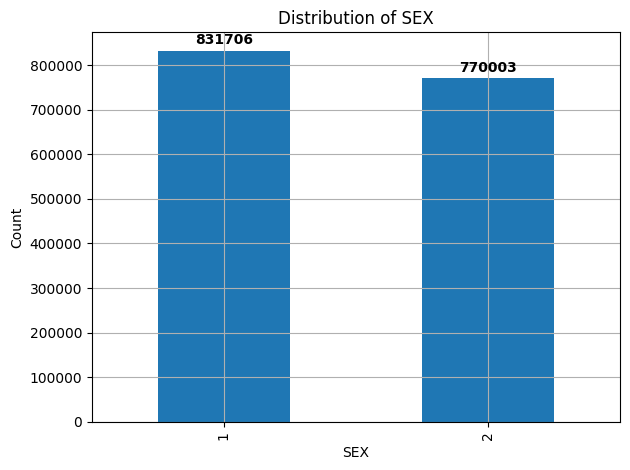

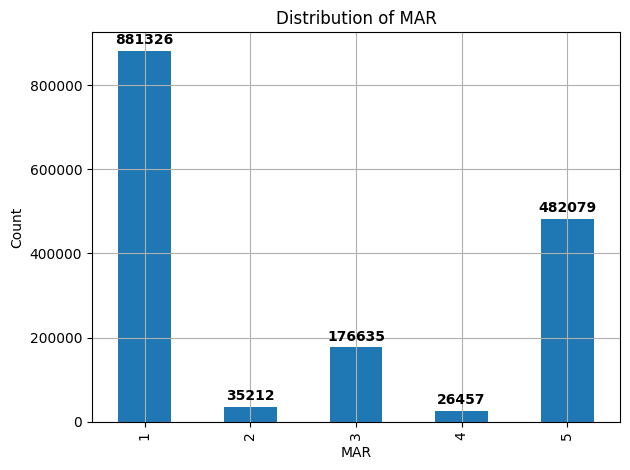

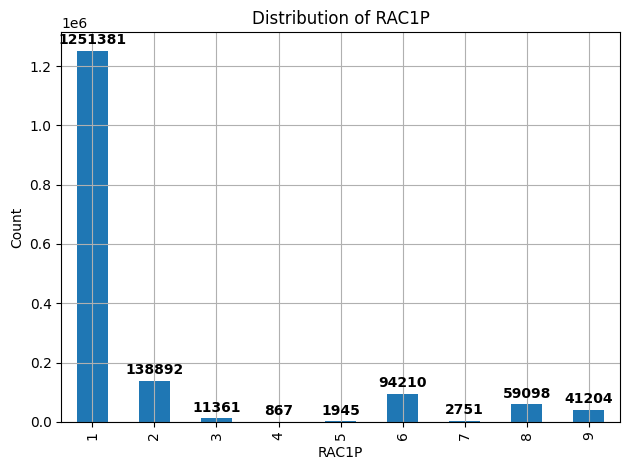

In [18]:
# List of categorical columns to plot
categorical_cols = ['SEX', 'MAR', 'RAC1P']

# Plot bar charts with grid lines and count labels
for col in categorical_cols:
    plt.figure()
    counts = df[col].value_counts().sort_index()
    ax = counts.plot(kind='bar', title=f'Distribution of {col}', grid=True)

    # Add value labels on top of each bar
    for i, v in enumerate(counts):
        ax.text(i, v + 0.01 * max(counts), str(v), ha='center', va='bottom', fontweight='bold')

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

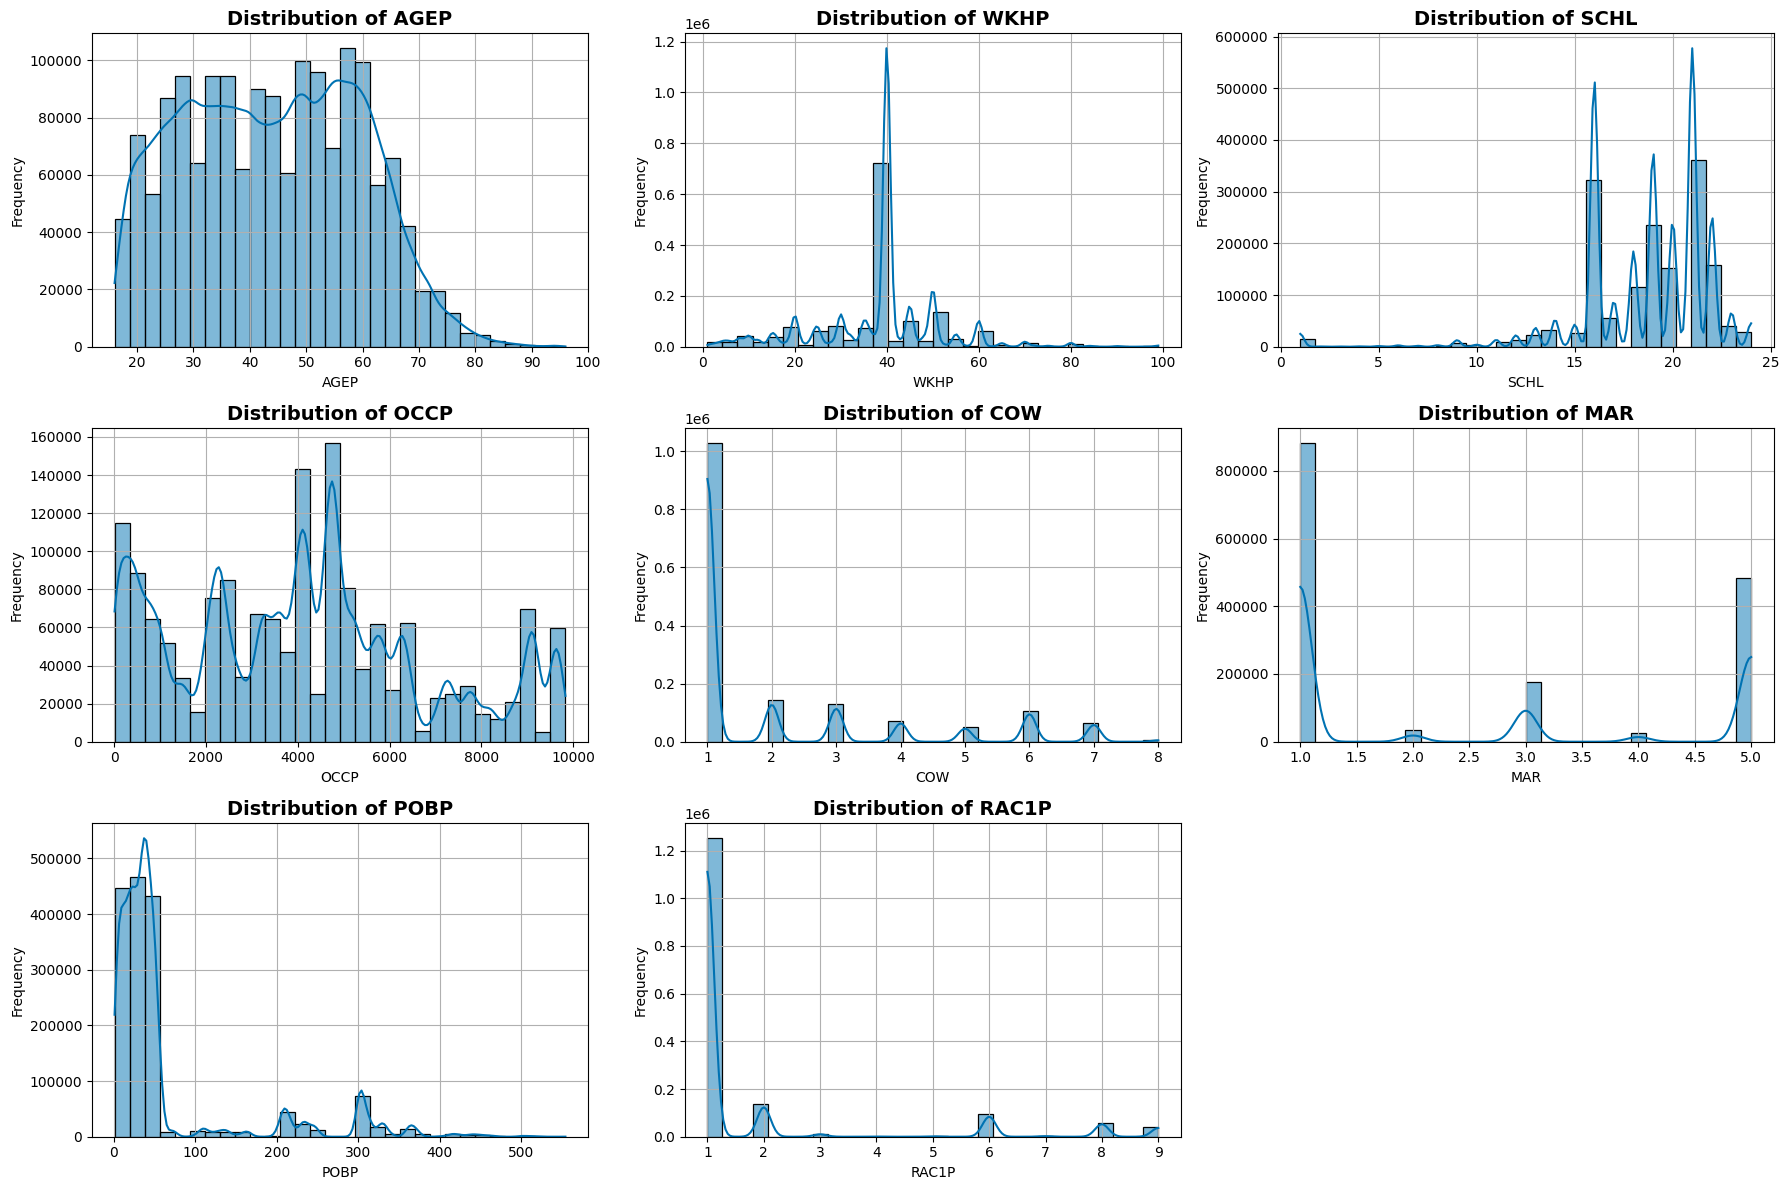

In [19]:
# Updated name
encoded_numeric_features = ['AGEP', 'WKHP', 'SCHL', 'OCCP', 'COW', 'MAR', 'POBP', 'RAC1P']

# Set up grid
num_features = len(encoded_numeric_features)
rows = (num_features + 2) // 3  # 3 per row
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(encoded_numeric_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="#0072B2")
    axes[i].set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [20]:
df.head()

,AGEP,SEX,RAC1P,SCHL,MAR,OCCP,WKHP,COW,POBP,Income_Above_50K
0,22,1,1,20.0,5,1555.0,40.0,5.0,17,0
1,18,2,1,19.0,5,4640.0,20.0,4.0,51,0
2,19,2,2,19.0,5,2350.0,12.0,1.0,24,0
3,21,2,1,19.0,5,310.0,10.0,1.0,36,0
4,21,1,1,18.0,5,3930.0,20.0,1.0,12,0


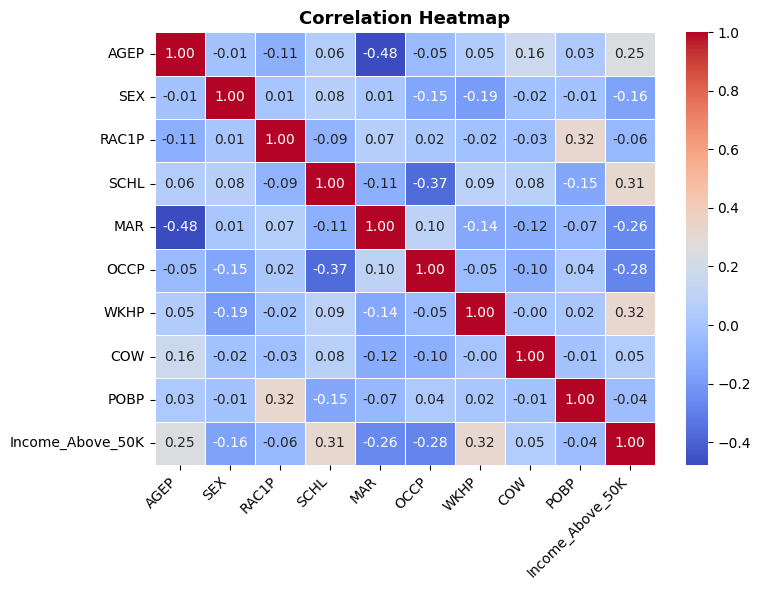

In [21]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [22]:
# Exact counts of target variable
df['Income_Above_50K'].value_counts()

Income_Above_50K
0    966822
1    634887
Name: count, dtype: int64

In [23]:
# Exact percentage of target variable
df['Income_Above_50K'].value_counts(normalize=True)

Income_Above_50K
0    0.603619
1    0.396381
Name: proportion, dtype: float64

In [24]:
# # Bar plots for categorical features
# for col in categorical_cols:
#     plt.figure(figsize=(6, 4))
#     df[col].value_counts().plot(kind='bar', color='orange')
#     plt.title(f"Count of Categories in {col}")
#     plt.xlabel(col)
#     plt.ylabel("Count")
#     plt.grid(axis='y')
#     plt.tight_layout()
#     plt.show()

In [25]:
df.POBP.nunique()

223

In [26]:
int(df.POBP.max())

554

In [27]:
# Define general features and target
X_all = df.drop(columns=["Income_Above_50K"])
y_all = df["Income_Above_50K"]

# Step 2: Split data for RF
from sklearn.model_selection import train_test_split

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_all, y_all, test_size=0.2, random_state=42, stratify=y_all)


## Random Forest Model

In [28]:
# Train a baseline Random Forest model for feature importance

rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
rf_baseline.fit(X_train_full, y_train_full)

rf_feature_importance = pd.DataFrame({"Feature": X_train_full.columns,
                                      "Importance": rf_baseline.feature_importances_ }).sort_values(by="Importance", ascending=False)

# Display top 5 features
top_features_rf = rf_feature_importance.head(5)["Feature"].tolist()
print("Selected features for Random Forest:", top_features_rf)


Selected features for Random Forest: ['OCCP', 'AGEP', 'POBP', 'WKHP', 'SCHL']


In [29]:
# Display full table
print(rf_feature_importance)

  Feature  Importance
5    OCCP    0.260419
0    AGEP    0.192259
8    POBP    0.168056
6    WKHP    0.136041
3    SCHL    0.113203
4     MAR    0.042643
7     COW    0.039431
1     SEX    0.025432
2   RAC1P    0.022516


In [30]:
top_features_rf = rf_feature_importance["Feature"].tolist()
print("Selected features for Random Forest:", top_features_rf)


Selected features for Random Forest: ['OCCP', 'AGEP', 'POBP', 'WKHP', 'SCHL', 'MAR', 'COW', 'SEX', 'RAC1P']


In [31]:
# Manually set features (first five)
selected_features_rf = ['OCCP', 'AGEP', 'POBP', 'WKHP', 'SCHL']

# Subset the data
X_train_rf = X_train_full[selected_features_rf]
X_test_rf = X_test_full[selected_features_rf]
y_train_rf = y_train_full
y_test_rf = y_test_full

# Train baseline Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_rf)


In [32]:
# Print classification report
print("Baseline Random Forest Classification Report:\n")
print(classification_report(y_test_rf, y_pred_rf))


Baseline Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.82      0.81    193365
           1       0.72      0.69      0.70    126977

    accuracy                           0.77    320342
   macro avg       0.76      0.76      0.76    320342
weighted avg       0.77      0.77      0.77    320342



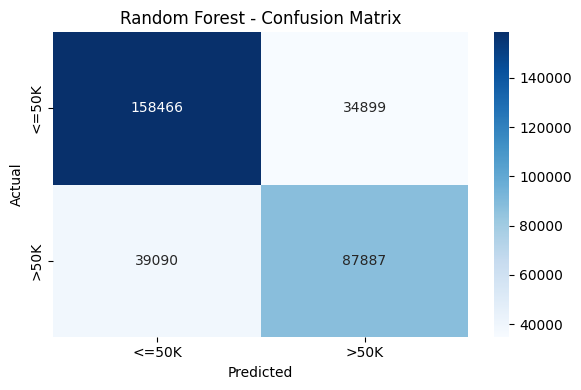

In [33]:
# Plot confusion matrix as heatmap
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



Model 1 - Params: {'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 2}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82    193365
           1       0.74      0.69      0.71    126977

    accuracy                           0.78    320342
   macro avg       0.77      0.76      0.76    320342
weighted avg       0.78      0.78      0.78    320342



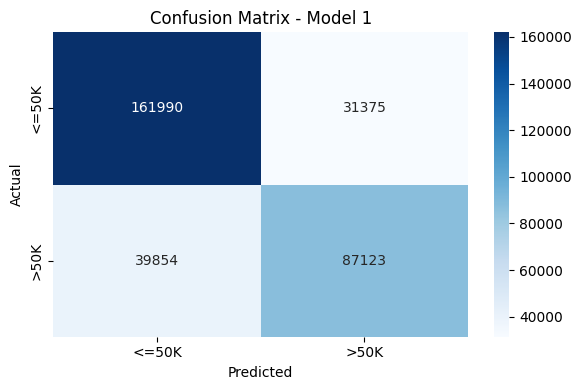


Model 2 - Params: {'n_estimators': 120, 'max_depth': 10, 'min_samples_split': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82    193365
           1       0.74      0.69      0.72    126977

    accuracy                           0.78    320342
   macro avg       0.77      0.77      0.77    320342
weighted avg       0.78      0.78      0.78    320342



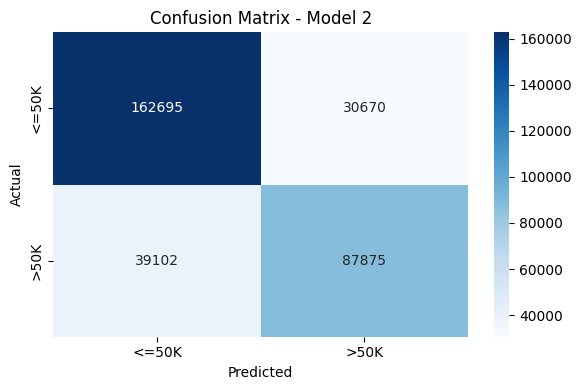


Model 3 - Params: {'n_estimators': 140, 'max_depth': 12, 'min_samples_split': 10}
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83    193365
           1       0.74      0.71      0.73    126977

    accuracy                           0.79    320342
   macro avg       0.78      0.77      0.78    320342
weighted avg       0.79      0.79      0.79    320342



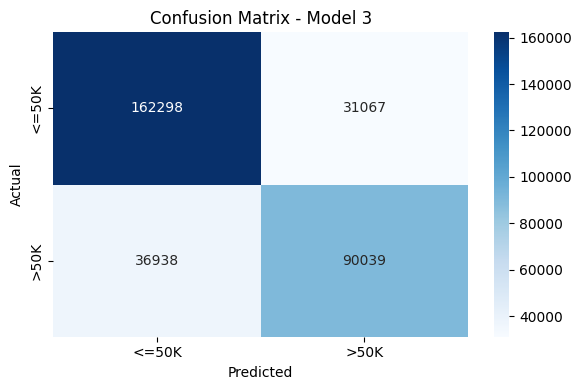


Model 4 - Params: {'n_estimators': 160, 'max_depth': 14, 'min_samples_split': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83    193365
           1       0.75      0.71      0.73    126977

    accuracy                           0.79    320342
   macro avg       0.78      0.78      0.78    320342
weighted avg       0.79      0.79      0.79    320342



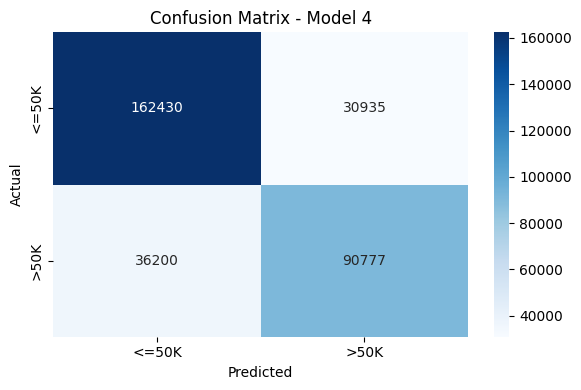


Model 5 - Params: {'n_estimators': 180, 'max_depth': 16, 'min_samples_split': 2}
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83    193365
           1       0.75      0.72      0.73    126977

    accuracy                           0.79    320342
   macro avg       0.78      0.78      0.78    320342
weighted avg       0.79      0.79      0.79    320342



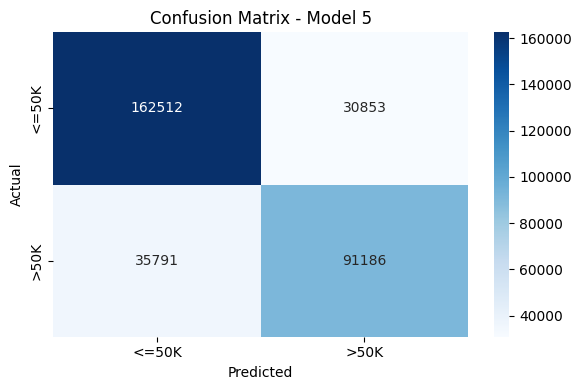


Model 6 - Params: {'n_estimators': 200, 'max_depth': 18, 'min_samples_split': 10}
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83    193365
           1       0.75      0.72      0.73    126977

    accuracy                           0.79    320342
   macro avg       0.79      0.78      0.78    320342
weighted avg       0.79      0.79      0.79    320342



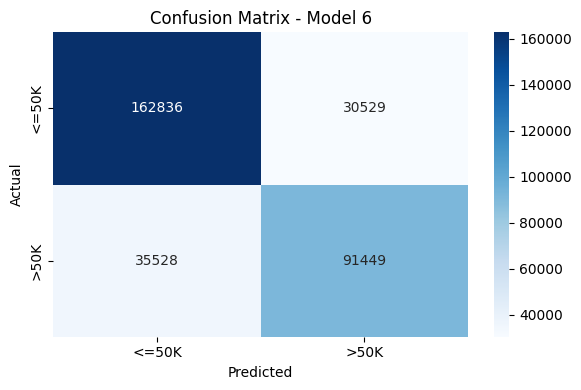


Model 7 - Params: {'n_estimators': 220, 'max_depth': 20, 'min_samples_split': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83    193365
           1       0.75      0.72      0.73    126977

    accuracy                           0.79    320342
   macro avg       0.78      0.78      0.78    320342
weighted avg       0.79      0.79      0.79    320342



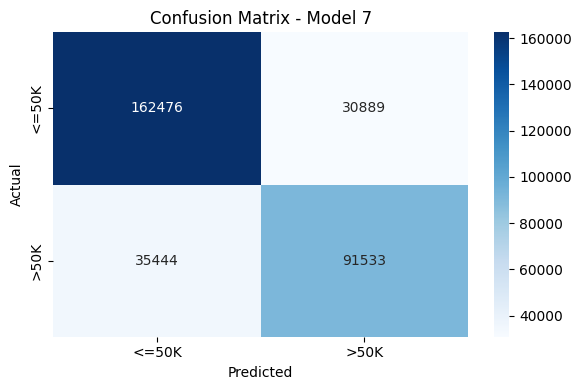


Model 8 - Params: {'n_estimators': 240, 'max_depth': 22, 'min_samples_split': 2}
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83    193365
           1       0.74      0.72      0.73    126977

    accuracy                           0.79    320342
   macro avg       0.78      0.78      0.78    320342
weighted avg       0.79      0.79      0.79    320342



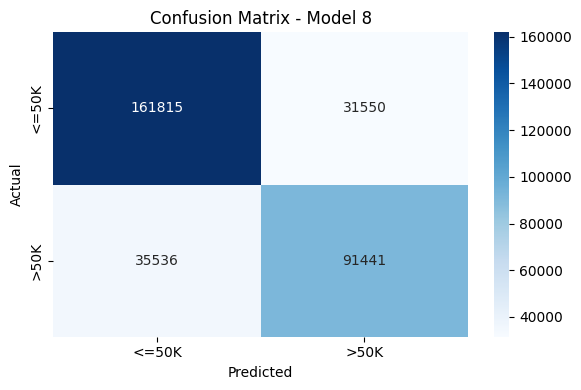


Model 9 - Params: {'n_estimators': 260, 'max_depth': 24, 'min_samples_split': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83    193365
           1       0.74      0.72      0.73    126977

    accuracy                           0.79    320342
   macro avg       0.78      0.78      0.78    320342
weighted avg       0.79      0.79      0.79    320342



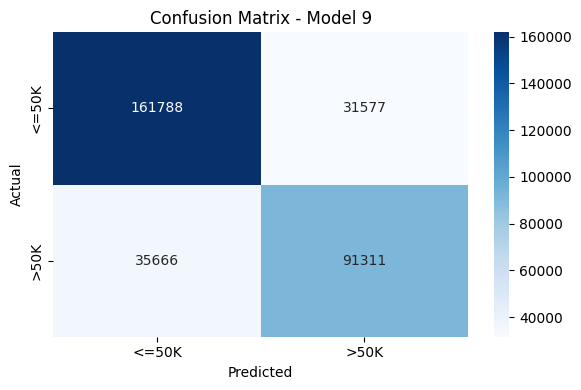


Model 10 - Params: {'n_estimators': 280, 'max_depth': 26, 'min_samples_split': 10}
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83    193365
           1       0.75      0.72      0.73    126977

    accuracy                           0.79    320342
   macro avg       0.78      0.78      0.78    320342
weighted avg       0.79      0.79      0.79    320342



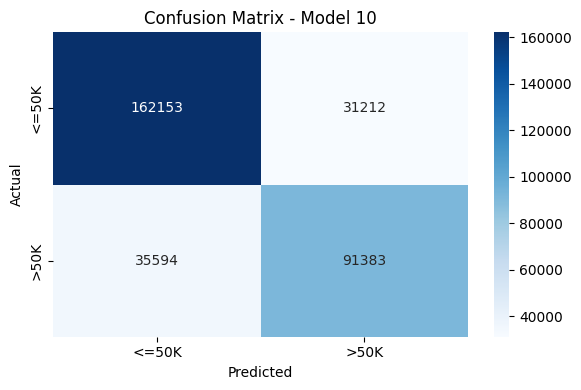

In [34]:

# Enhanced parameter grid with varied `min_samples_split`
rf_param_grid = [
    {"n_estimators": 100, "max_depth": 8, "min_samples_split": 2},   # Model 1
    {"n_estimators": 120, "max_depth": 10, "min_samples_split": 5},  # Model 2
    {"n_estimators": 140, "max_depth": 12, "min_samples_split": 10}, # Model 3
    {"n_estimators": 160, "max_depth": 14, "min_samples_split": 5},  # Model 4
    {"n_estimators": 180, "max_depth": 16, "min_samples_split": 2},  # Model 5
    {"n_estimators": 200, "max_depth": 18, "min_samples_split": 10}, # Model 6
    {"n_estimators": 220, "max_depth": 20, "min_samples_split": 5},  # Model 7
    {"n_estimators": 240, "max_depth": 22, "min_samples_split": 2},  # Model 8
    {"n_estimators": 260, "max_depth": 24, "min_samples_split": 5},  # Model 9
    {"n_estimators": 280, "max_depth": 26, "min_samples_split": 10}  # Model 10
]

# Optional: Store results
model_results = []

# Loop through and evaluate each configuration
for i, params in enumerate(rf_param_grid, 1):
    model = RandomForestClassifier(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_rf, y_train_rf)
    y_pred = model.predict(X_test_rf)

    print(f"\nModel {i} - Params: {params}")
    report = classification_report(y_test_rf, y_pred)
    print("Classification Report:\n", report)

    # Confusion Matrix heatmap
    cm_rf = confusion_matrix(y_test_rf, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
                xticklabels=["<=50K", ">50K"],
                yticklabels=["<=50K", ">50K"])
    plt.title(f"Confusion Matrix - Model {i}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Store for optional summary
    model_results.append({
        "Model": f"Model {i}",
        "Params": params,
        "Accuracy": model.score(X_test_rf, y_test_rf)
    })


In [35]:
# Retrain the best model using Model 6's hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=18,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)
best_rf_model.fit(X_train_rf, y_train_rf)

# Save the trained model using pickle
with open("final_random_forest_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

print("Final Random Forest model saved successfully as 'final_random_forest_model.pkl'")


Final Random Forest model saved successfully as 'final_random_forest_model.pkl'


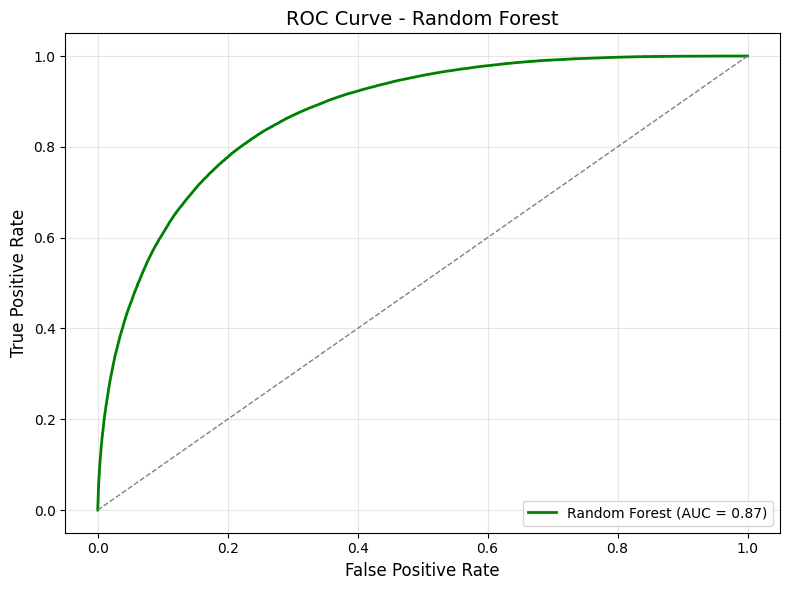

In [36]:
# Predict probabilities for class 1
y_probs_rf = best_rf_model.predict_proba(X_test_rf)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_probs_rf)
auc_rf = roc_auc_score(y_test_rf, y_probs_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', linewidth=2, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)
plt.title('ROC Curve - Random Forest', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Logistic Regression

In [37]:
# Initialize base logistic regression model with a scalable solver
lr_base = LogisticRegression(max_iter=2000, solver='saga', penalty='l2', random_state=42)

# Apply RFE to select top 5 features
rfe_selector = RFE(estimator=lr_base, n_features_to_select=5)
rfe_selector.fit(X_train_full, y_train_full)

# Get selected features
selected_features_lr = X_train_full.columns[rfe_selector.support_].tolist()
print("Selected features for Logistic Regression:", selected_features_lr)

C:\Users\Mustapha Yusuf\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Selected features for Logistic Regression: ['SEX', 'SCHL', 'MAR', 'WKHP', 'COW']


In [38]:
# Subset the data
X_train_lr = X_train_full[selected_features_lr]
X_test_lr = X_test_full[selected_features_lr]
y_train_lr = y_train_full
y_test_lr = y_test_full

# Train logistic regression model
lr_model = LogisticRegression(max_iter=2000, solver='saga', penalty='l2', random_state=42)
lr_model.fit(X_train_lr, y_train_lr)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_lr)

# Classification report
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test_lr, y_pred_lr))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.82      0.79    193365
           1       0.70      0.62      0.66    126977

    accuracy                           0.74    320342
   macro avg       0.73      0.72      0.73    320342
weighted avg       0.74      0.74      0.74    320342



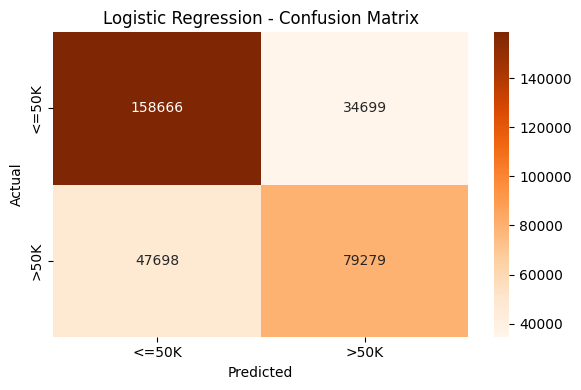

In [39]:
# Confusion matrix heatmap
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

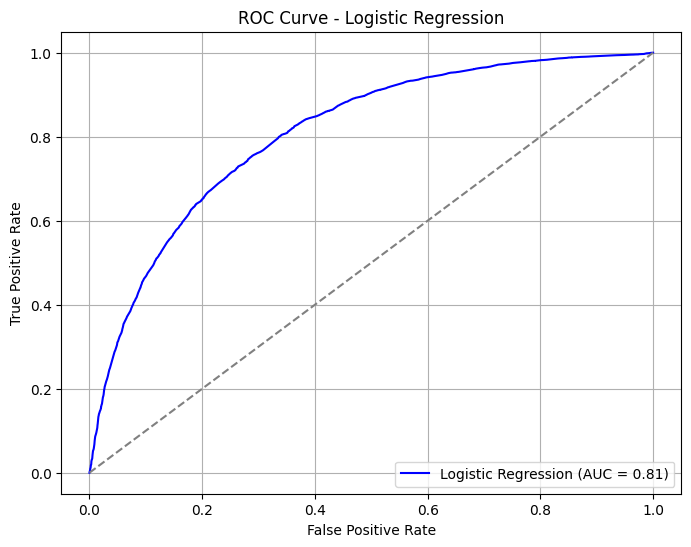

In [40]:
# Predict probabilities for the positive class (">50K")
y_probs_lr = lr_model.predict_proba(X_test_lr)[:, 1]

# Compute ROC curve and AUC score
fpr_lr, tpr_lr, _ = roc_curve(y_test_lr, y_probs_lr)
auc_lr = roc_auc_score(y_test_lr, y_probs_lr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



Model 1 - C = 0.001
              precision    recall  f1-score   support

           0       0.77      0.82      0.79    193365
           1       0.70      0.62      0.66    126977

    accuracy                           0.74    320342
   macro avg       0.73      0.72      0.73    320342
weighted avg       0.74      0.74      0.74    320342



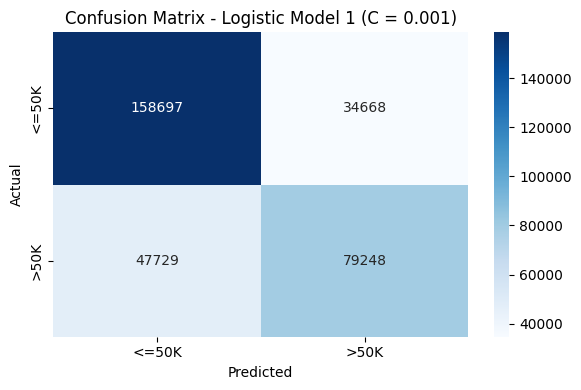


Model 2 - C = 0.01
              precision    recall  f1-score   support

           0       0.77      0.82      0.79    193365
           1       0.70      0.62      0.66    126977

    accuracy                           0.74    320342
   macro avg       0.73      0.72      0.73    320342
weighted avg       0.74      0.74      0.74    320342



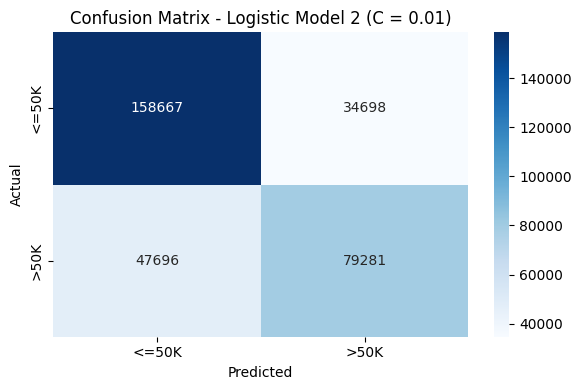


Model 3 - C = 0.1
              precision    recall  f1-score   support

           0       0.77      0.82      0.79    193365
           1       0.70      0.62      0.66    126977

    accuracy                           0.74    320342
   macro avg       0.73      0.72      0.73    320342
weighted avg       0.74      0.74      0.74    320342



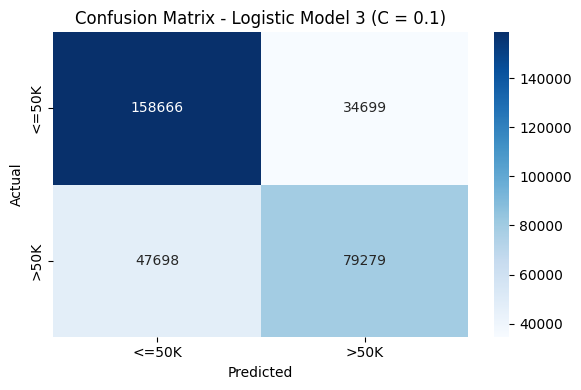


Model 4 - C = 1
              precision    recall  f1-score   support

           0       0.77      0.82      0.79    193365
           1       0.70      0.62      0.66    126977

    accuracy                           0.74    320342
   macro avg       0.73      0.72      0.73    320342
weighted avg       0.74      0.74      0.74    320342



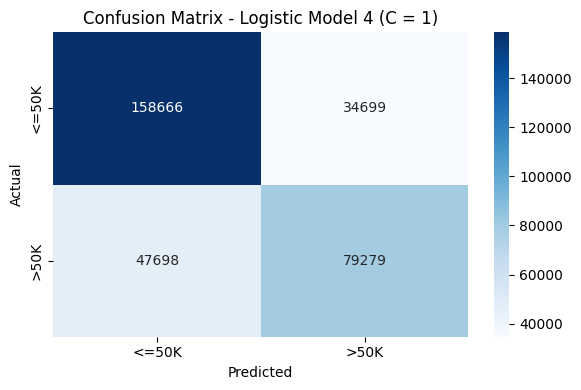


Model 5 - C = 10
              precision    recall  f1-score   support

           0       0.77      0.82      0.79    193365
           1       0.70      0.62      0.66    126977

    accuracy                           0.74    320342
   macro avg       0.73      0.72      0.73    320342
weighted avg       0.74      0.74      0.74    320342



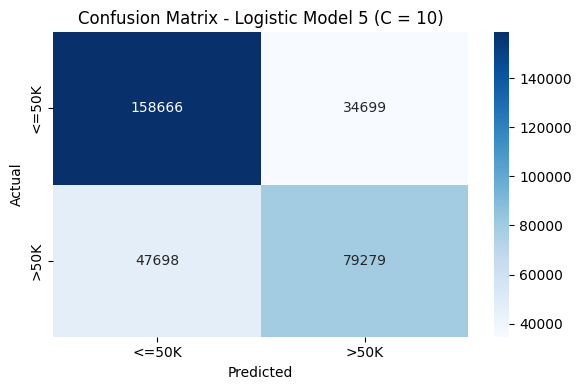

In [41]:
c_values = [0.001, 0.01, 0.1, 1, 10]
results_lr = []

# Loop through each C value manually
for i, c in enumerate(c_values, 1):
    model = LogisticRegression(
        C=c,
        penalty='l2',
        solver='saga',  
        max_iter=2000,
        random_state=42,
        n_jobs=-1       
    )

    model.fit(X_train_lr, y_train_lr)
    y_pred = model.predict(X_test_lr)

    print(f"\nModel {i} - C = {c}")
    print(classification_report(y_test_lr, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test_lr, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["<=50K", ">50K"],
                yticklabels=["<=50K", ">50K"])
    plt.title(f"Confusion Matrix - Logistic Model {i} (C = {c})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Save result
    results_lr.append({
        "Model": f"Model {i}",
        "C": c,
        "Accuracy": model.score(X_test_lr, y_test_lr)
    })

In [42]:
#  Re-train the final Logistic Regression model with chosen parameters (Model 3)
best_lr_model = LogisticRegression(
    C=0.1,                # Selected C value
    penalty='l2',         # Regularization type
    solver='saga',        # Scalable solver for large datasets
    max_iter=2000,        # Increased to ensure convergence
    random_state=42
)

# Fit model on selected features
best_lr_model.fit(X_train_lr, y_train_lr)


LogisticRegression(C=0.1, max_iter=2000, random_state=42, solver='saga')

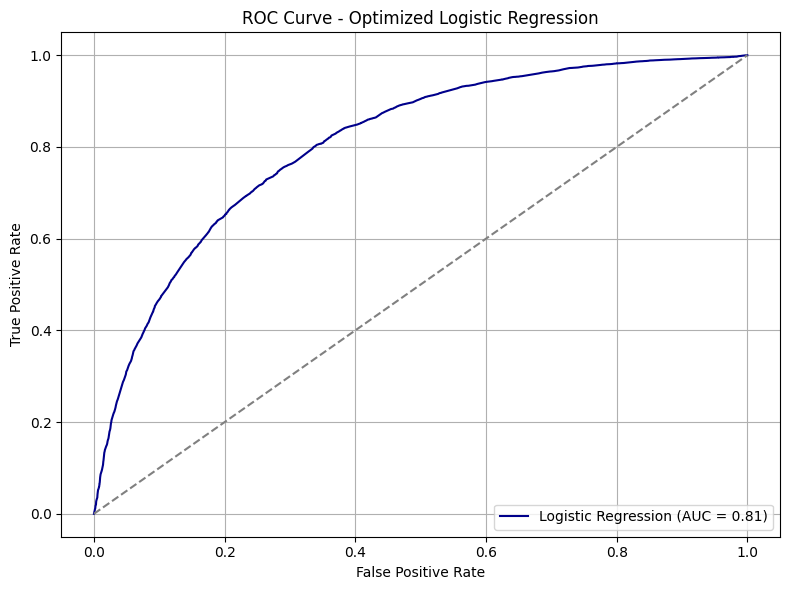

In [43]:
# Predict probability scores
y_probs_lr_opt = best_lr_model.predict_proba(X_test_lr)[:, 1]

# Calculate ROC curve
fpr_lr_opt, tpr_lr_opt, _ = roc_curve(y_test_lr, y_probs_lr_opt)
auc_lr_opt = roc_auc_score(y_test_lr, y_probs_lr_opt)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_opt, tpr_lr_opt, label=f"Logistic Regression (AUC = {auc_lr_opt:.2f})", color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Optimized Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:

# Save the optimized Logistic Regression model to disk
with open("best_logistic_regression_model.pkl", "wb") as file:
    pickle.dump(best_lr_model, file)

print("Optimized Logistic Regression model saved successfully as 'best_logistic_regression_model.pkl'")


Optimized Logistic Regression model saved successfully as 'best_logistic_regression_model.pkl'


## Gradient Boosting

In [45]:
 # Fit baseline GB model using full training data
gb_baseline = GradientBoostingClassifier(random_state=42)
gb_baseline.fit(X_train_full, y_train_full)

# Get feature importances
gb_feature_importance = pd.DataFrame({
    "Feature": X_train_full.columns,
    "Importance": gb_baseline.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Select top 5 features
top_features_gb = gb_feature_importance.head(5)["Feature"].tolist()
print("Selected features for Gradient Boosting:", top_features_gb)

#Subset training and test data
X_train_gb = X_train_full[top_features_gb]
X_test_gb = X_test_full[top_features_gb]
y_train_gb = y_train_full
y_test_gb = y_test_full


Selected features for Gradient Boosting: ['OCCP', 'WKHP', 'SCHL', 'AGEP', 'SEX']


In [46]:
# Fit baseline GB model using full training data
gb_baseline = GradientBoostingClassifier(random_state=42)
gb_baseline.fit(X_train_full, y_train_full)

# Get feature importances (all features sorted)
gb_feature_importance = pd.DataFrame({
    "Feature": X_train_full.columns,
    "Importance": gb_baseline.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display all features by importance
print("All Features Ranked by Importance (Gradient Boosting):\n")
print(gb_feature_importance.to_string(index=False))


All Features Ranked by Importance (Gradient Boosting):

Feature  Importance
   OCCP    0.276759
   WKHP    0.242165
   SCHL    0.219922
   AGEP    0.151007
    SEX    0.047167
    MAR    0.037484
    COW    0.014332
   POBP    0.008542
  RAC1P    0.002622


In [47]:
gb_baseline

GradientBoostingClassifier(random_state=42)

Baseline Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.82      0.81    193365
           1       0.71      0.69      0.70    126977

    accuracy                           0.77    320342
   macro avg       0.76      0.75      0.75    320342
weighted avg       0.77      0.77      0.77    320342



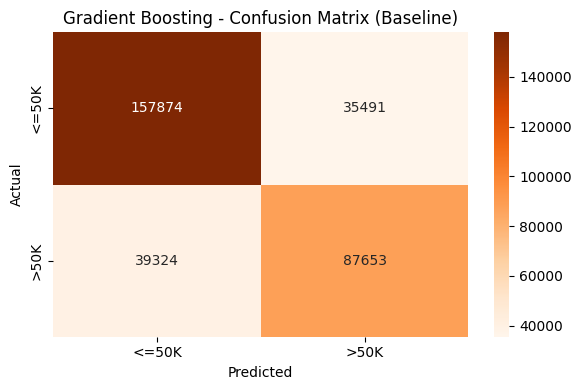

In [48]:
selected_features_gb = ['WKHP', 'SCHL', 'AGEP', 'COW', 'SEX']


# Subset data with selected GDPR-safe features
X_train_gb = X_train_full[selected_features_gb]
X_test_gb = X_test_full[selected_features_gb]
y_train_gb = y_train_full
y_test_gb = y_test_full

# Initialize and fit baseline Gradient Boosting model
gb_baseline = GradientBoostingClassifier(random_state=42)
gb_baseline.fit(X_train_gb, y_train_gb)

#  Predict on test set
y_pred_gb_base = gb_baseline.predict(X_test_gb)

# Print classification report
print("Baseline Gradient Boosting Classification Report:\n")
print(classification_report(y_test_gb, y_pred_gb_base))

# Plot confusion matrix as heatmap
cm_gb = confusion_matrix(y_test_gb, y_pred_gb_base)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Gradient Boosting - Confusion Matrix (Baseline)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



Model 1 - Params: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81    193365
           1       0.71      0.69      0.70    126977

    accuracy                           0.77    320342
   macro avg       0.76      0.75      0.75    320342
weighted avg       0.77      0.77      0.77    320342



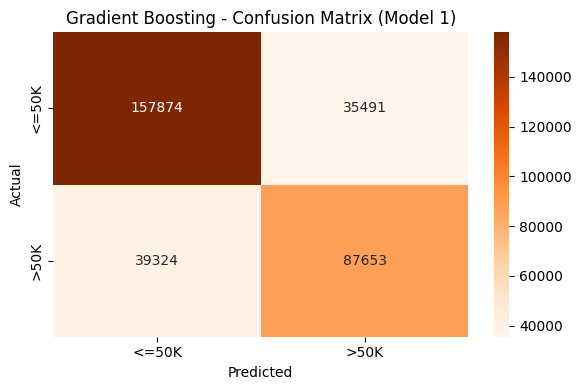


Model 2 - Params: {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81    193365
           1       0.71      0.69      0.70    126977

    accuracy                           0.77    320342
   macro avg       0.76      0.75      0.76    320342
weighted avg       0.77      0.77      0.77    320342



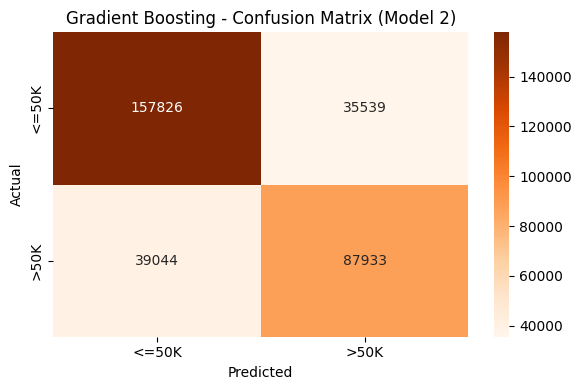


Model 3 - Params: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81    193365
           1       0.71      0.69      0.70    126977

    accuracy                           0.77    320342
   macro avg       0.76      0.75      0.75    320342
weighted avg       0.77      0.77      0.77    320342



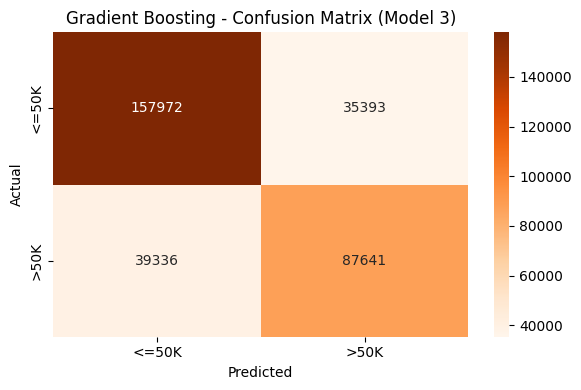


Model 4 - Params: {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81    193365
           1       0.71      0.70      0.70    126977

    accuracy                           0.77    320342
   macro avg       0.76      0.76      0.76    320342
weighted avg       0.77      0.77      0.77    320342



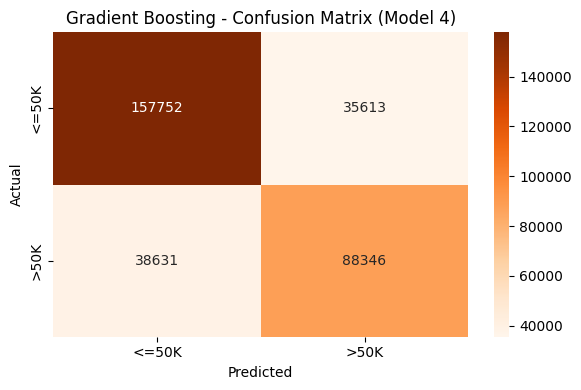


Model 5 - Params: {'n_estimators': 180, 'learning_rate': 0.05, 'max_depth': 7}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81    193365
           1       0.72      0.69      0.70    126977

    accuracy                           0.77    320342
   macro avg       0.76      0.76      0.76    320342
weighted avg       0.77      0.77      0.77    320342



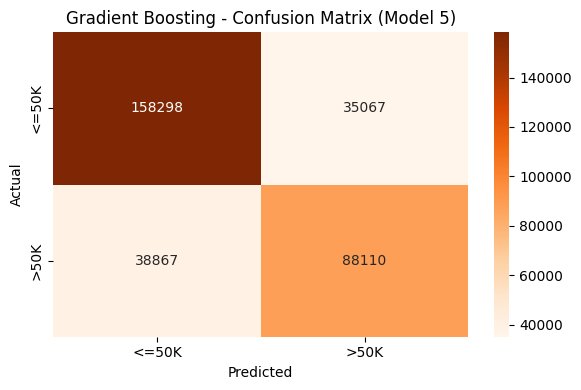

In [49]:
# Define parameter configurations to test
gb_param_grid = [
    {"n_estimators": 100, "learning_rate": 0.1, "max_depth": 3},
    {"n_estimators": 150, "learning_rate": 0.1, "max_depth": 3},
    {"n_estimators": 100, "learning_rate": 0.05, "max_depth": 5},
    {"n_estimators": 150, "learning_rate": 0.05, "max_depth": 5},
    {"n_estimators": 180, "learning_rate": 0.05, "max_depth": 7},
]

# Optional: Store results
gb_model_results = []

# Loop through each configuration
for i, params in enumerate(gb_param_grid, 1):
    model = GradientBoostingClassifier(
        n_estimators=params["n_estimators"],
        learning_rate=params["learning_rate"],
        max_depth=params["max_depth"],
        random_state=42
    )

    model.fit(X_train_gb, y_train_gb)
    y_pred = model.predict(X_test_gb)

    print(f"\nModel {i} - Params: {params}")
    print("Classification Report:\n", classification_report(y_test_gb, y_pred))

    # Confusion Matrix as heatmap
    cm = confusion_matrix(y_test_gb, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=["<=50K", ">50K"],
                yticklabels=["<=50K", ">50K"])
    plt.title(f"Gradient Boosting - Confusion Matrix (Model {i})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Save result
    gb_model_results.append({
        "Model": f"Model {i}",
        "Params": params,
        "Accuracy": model.score(X_test_gb, y_test_gb)
    })


Optimized Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.82      0.81    193365
           1       0.71      0.69      0.70    126977

    accuracy                           0.77    320342
   macro avg       0.76      0.75      0.75    320342
weighted avg       0.77      0.77      0.77    320342



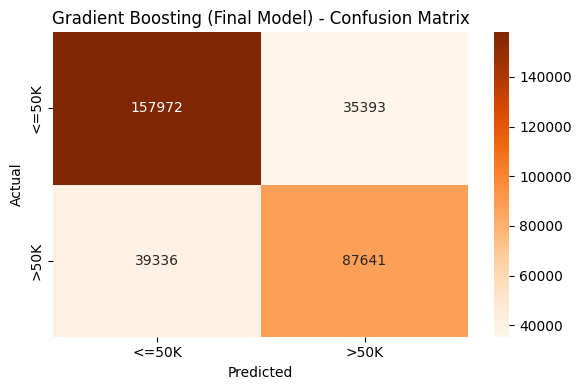

✅ Final Gradient Boosting model saved as 'final_gradient_boosting_model.pkl'


In [50]:
#  Refit the best GB model (Model 3)
best_gb_final = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
best_gb_final.fit(X_train_gb, y_train_gb)

# ✅ Step 2: Predict and evaluate
y_pred_gb_final = best_gb_final.predict(X_test_gb)

print("Optimized Gradient Boosting Classification Report:\n")
print(classification_report(y_test_gb, y_pred_gb_final))

# Confusion matrix heatmap
cm_gb_final = confusion_matrix(y_test_gb, y_pred_gb_final)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb_final, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.title("Gradient Boosting (Final Model) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Save final GB model
with open("final_gradient_boosting_model.pkl", "wb") as f:
    pickle.dump(best_gb_final, f)

print("✅ Final Gradient Boosting model saved as 'final_gradient_boosting_model.pkl'")

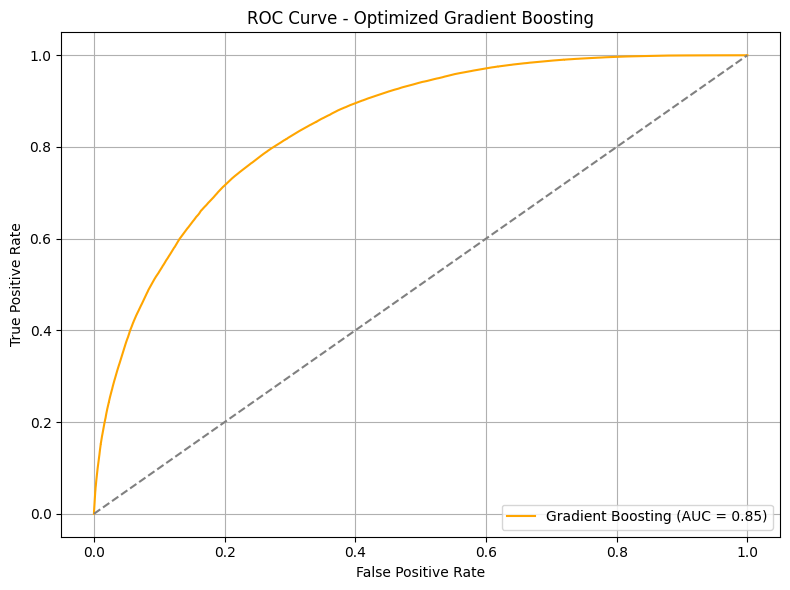

In [51]:
# Step 1: Predict probability scores for the positive class
y_probs_gb = best_gb_final.predict_proba(X_test_gb)[:, 1]

# Step 2: Calculate ROC curve and AUC
fpr_gb, tpr_gb, _ = roc_curve(y_test_gb, y_probs_gb)
auc_gb = roc_auc_score(y_test_gb, y_probs_gb)

# Step 3: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='orange', label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Optimized Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparing models

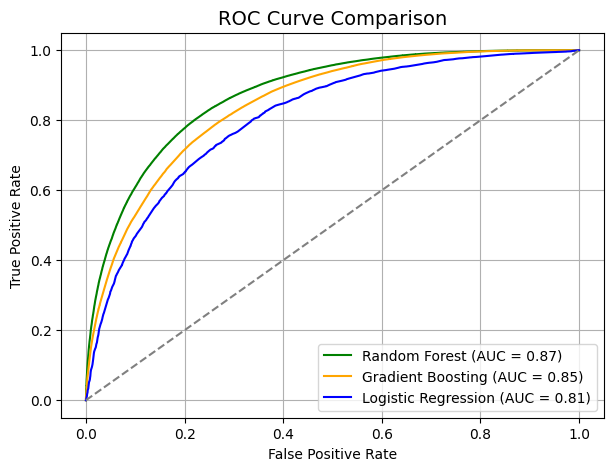

In [52]:
# ---- Predict probabilities for each model ----

# Random Forest
y_probs_rf = best_rf_model.predict_proba(X_test_rf)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_probs_rf)
auc_rf = roc_auc_score(y_test_rf, y_probs_rf)

# Gradient Boosting
y_probs_gb = best_gb_final.predict_proba(X_test_gb)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test_gb, y_probs_gb)
auc_gb = roc_auc_score(y_test_gb, y_probs_gb)

# Logistic Regression — fixed the variable here!
y_probs_lr = best_lr_model.predict_proba(X_test_lr)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_lr, y_probs_lr)
auc_lr = roc_auc_score(y_test_lr, y_probs_lr)

# ---- Plotting the ROC curves ----

plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='green')
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_gb:.2f})", color='orange')
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("ROC Curve Comparison", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [53]:
# saving the random forest model as a compressed fil since its the highest
with gzip.open("final_rf_model_compressed.pkl.gz", "wb") as f:
    pickle.dump(best_rf_model, f)

print("Final Random Forest model saved successfully as a compressed file")

Final Random Forest model saved successfully as a compressed file
